# About The Data

The data consists of 48x48 pixel grayscale images of faces. The faces have been automatically registered so that the face is more or less centered and occupies about the same amount of space in each image. The task is to categorize each face based on the emotion shown in the facial expression in to one of seven categories 

0=Angry <br />
1=Disgust<br />
2=Fear<br />
3=Happy<br />
4=Sad<br />
5=Surprise<br />
6=Neutral<br />

train.csv contains two columns, "emotion" and "pixels". The "emotion" column contains a numeric code ranging from 0 to 6, inclusive, for the emotion that is present in the image. The "pixels" column contains a string surrounded in quotes for each image. The contents of this string a space-separated pixel values in row major order. test.csv contains only the "pixels" column and your task is to predict the emotion column.

https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data

In [54]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

% matplotlib inline

In [55]:
# load the data
data = pd.read_csv(r'emotion.csv')

In [56]:
# extracting the target variable and put the data in a numpy matrix
target = data['emotion']
pics = data['pixels']
X = np.zeros((len(pics), 48**2))
for i, pic in enumerate(pics):
    X[i,:] = np.asarray(pic.split(' '), dtype = np.float32)

In [57]:
# shape of data
print('shape of data:\n')
print('number of data points: {}'.format(X.shape[0]))
print('number of features: {}'.format(X.shape[1]))

shape of data:

number of data points: 28709
number of features: 2304


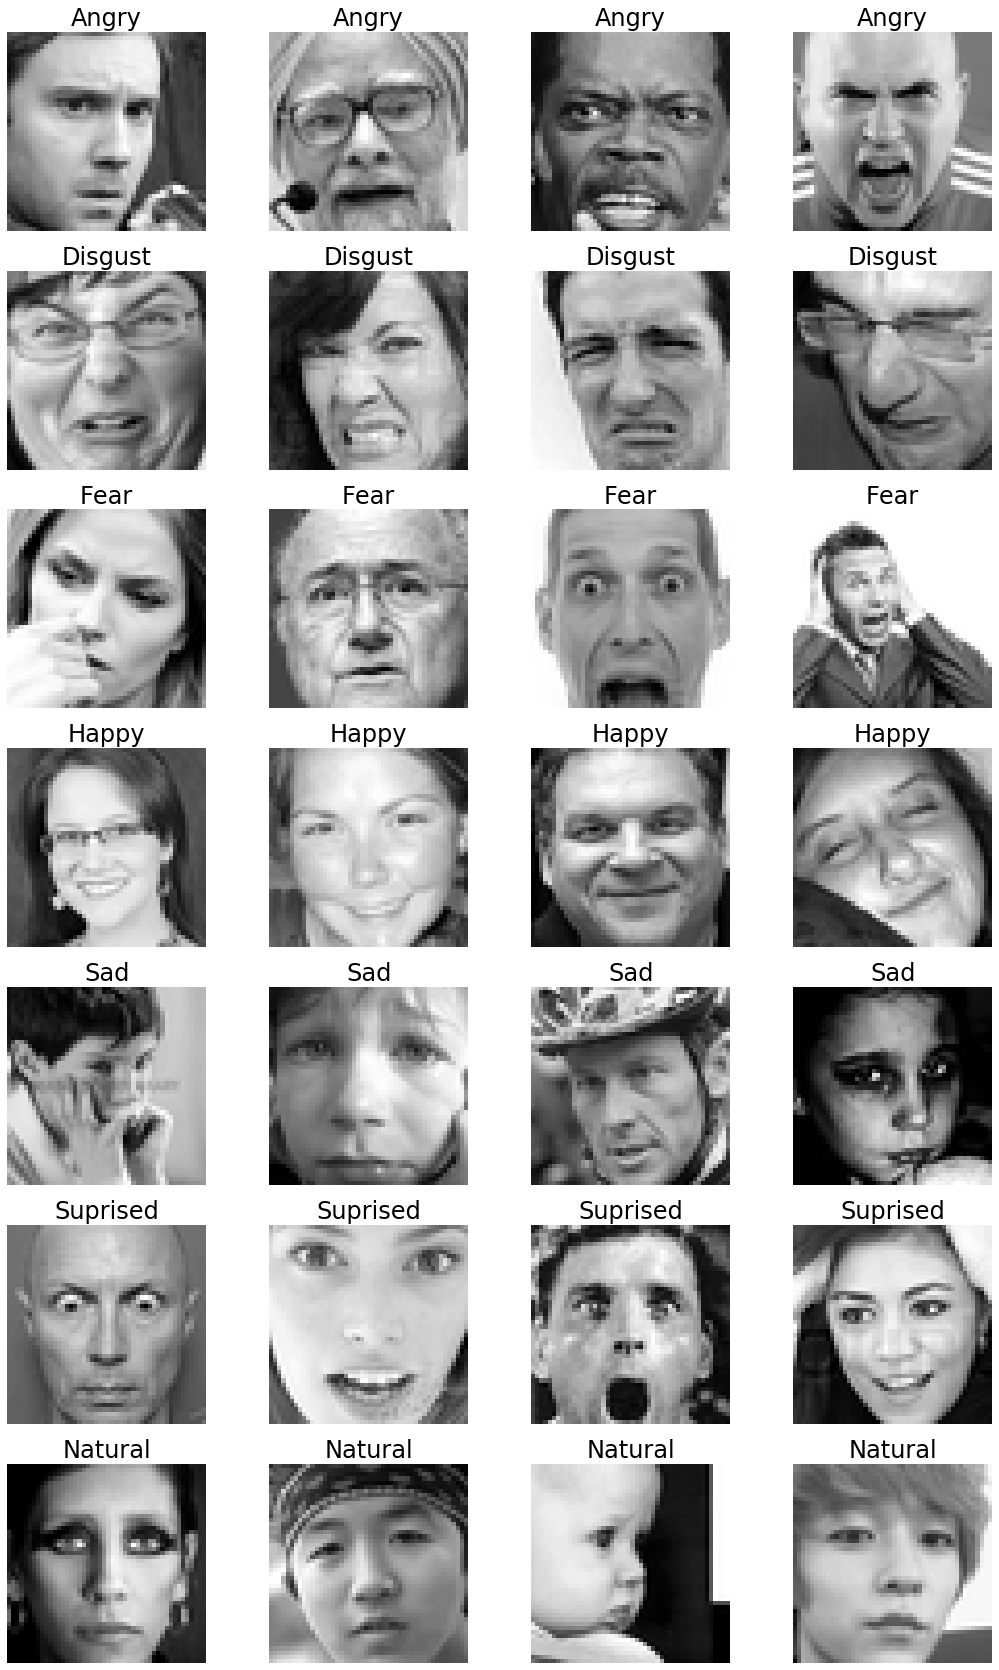

In [58]:
# show some examples of each emotion
emotion_map = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Suprised', 6:'Natural'}

f, a = plt.subplots(7,4,figsize = (18,30))
for emotion in range(7):
    for example in range(4):
        
        # find examples of emotion
        examples = X[target == emotion]
        
        a[emotion, example].imshow(examples[example,:].reshape((48,48)), cmap='gray')
        a[emotion, example].set_title(emotion_map[emotion], fontsize = 24)
        a[emotion, example].axis('off')

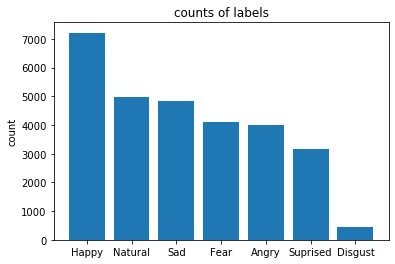

In [59]:
# is the dataset balanced?
counts = target.value_counts()
{0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Suprised', 6:'Natural'}
names = ['Happy','Natural','Sad','Fear','Angry','Suprised','Disgust']

plt.bar(names, counts)
plt.title('counts of labels')
plt.ylabel('count');

**our dataset is not balanced. we can definitely remove disgust, which is not really relevant to what we are trying to do. another option is to turn this into a binary classification - is the person feeling a positive or a negative emotion? this is also a good idea since the google text sentiment analysis API also returns only positive/negative labels back**

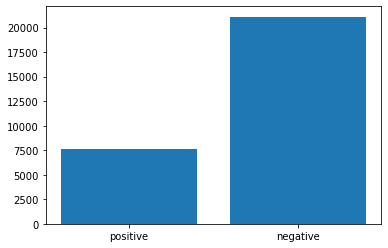

In [60]:
# lets comapre the number of positive/natural labels and negative ones
positive = counts[0] + counts[1] + counts[5]
negative = np.sum(counts) - positive

plt.bar(['positive','negative'],[positive, negative]);

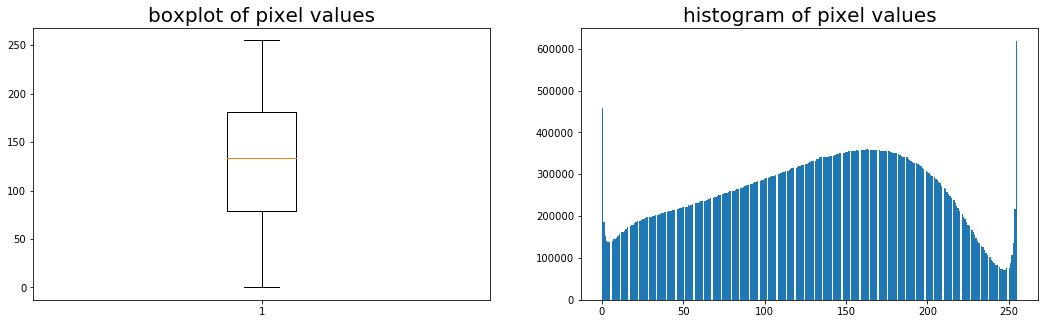

In [67]:
# statistical properties
all_pixels = X.flatten()
f, a = plt.subplots(1,2,figsize=(18,5))
a[1].hist(all_pixels, 300)
a[1].set_title('histogram of pixel values', fontsize=20)
a[0].boxplot(all_pixels)
a[0].set_title('boxplot of pixel values', fontsize=20);

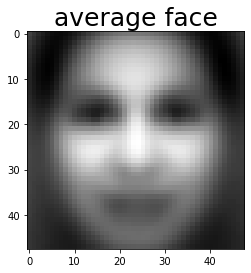

In [75]:
# mean image
mean = np.mean(X, axis=0)
plt.imshow(mean.reshape(48,48), cmap='gray')
plt.title('average face', fontsize=25);

**this is the way faces should be perceived by the camera in the first version of the product. afterwards, this will be the bounding box that will bre taken of the face**

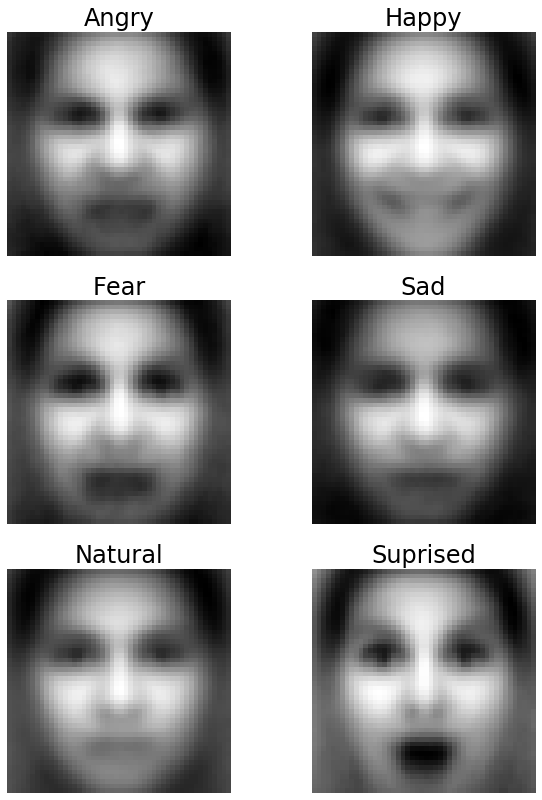

In [85]:
# mean face by emotion
f, a = plt.subplots(3,2,figsize=(10,14))
for emotion, loc in zip([0,2,3,4,5,6], [[0,0],[1,0],[0,1],[1,1],[2,1],[2,0]]):
    
    # get mean emotion
    examples = X[target == emotion]
    mean = np.mean(examples, axis=0).reshape(48,48)
    a[loc[0],loc[1]].imshow(mean, cmap='gray')
    a[loc[0],loc[1]].set_title(emotion_map[emotion], fontsize = 24)
    a[loc[0],loc[1]].axis('off')